In [4]:
import scipy
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import os
import seaborn as sns
import pandas as pd
from IPython.display import display
pd.options.display.max_columns = None

### 1. data applicability to research question(10)

important features
age + past crime

where does the database come from
github link
compare the original database to csv that github link used 

COMPAS technical documents
http://www.northpointeinc.com/files/technical_documents/FieldGuide2_081412.pdf

### 2. adherence to ethical data collection standards(5)

### 3. inventiveness in getting and combining data(5)

### 4. description of data (variables/features, cases/data points, descriptive stats, cautions)(20)

In [9]:
pwd

'/Users/violetyao/Desktop/Exploring-COMPAS-Bias'

In [14]:
compas_raw = pd.read_csv('data/compas-scores-raw.csv')
compas_raw.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


In [70]:
display(compas_raw)

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,ScaleSet,AssessmentReason,Language,LegalStatus,CustodyStatus,MaritalStatus,Screening_Date,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/13 0:00,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0
5,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Married,1/1/13 0:00,1,Low,18,Risk of Failure to Appear,19.00,3,Low,New,1,0
6,50855,57181,51963,PRETRIAL,DAYES,DANIEL,NaN,Male,African-American,08/25/94,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,4,High,7,Risk of Violence,-1.20,8,High,New,1,0
7,50855,57181,51963,PRETRIAL,DAYES,DANIEL,NaN,Male,African-American,08/25/94,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,4,High,8,Risk of Recidivism,0.18,8,High,New,1,0
8,50855,57181,51963,PRETRIAL,DAYES,DANIEL,NaN,Male,African-American,08/25/94,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Single,1/1/13 0:00,4,High,18,Risk of Failure to Appear,13.00,1,Low,New,1,0
9,50850,57176,51958,PRETRIAL,Debe,Mikerlie,George,Female,African-American,10/09/94,22,Risk and Prescreen,Intake,English,Pretrial,Jail Inmate,Significant Other,1/1/13 0:00,2,Medium,7,Risk of Violence,-1.29,7,Medium,New,1,0


In [23]:
compas_raw.shape

(60843, 28)

In [55]:
raw_sex = compas_raw.loc[:,["Sex_Code_Text"]]
raw_sex_grouped = raw_sex.groupby(["Sex_Code_Text"]).size().reset_index()
raw_sex_grouped.columns = ["Sex_Code_Text","count"]
raw_sex_grouped

,Sex_Code_Text,count
0,Female,13329
1,Male,47514


In [58]:
raw_ethnic = compas_raw.loc[:,["Ethnic_Code_Text"]]
raw_ethnic_grouped = raw_ethnic.groupby(["Ethnic_Code_Text"]).size().reset_index()
raw_ethnic_grouped.columns = ["Ethnic_Code_Text","count"]
raw_ethnic_grouped

,Ethnic_Code_Text,count
0,African-Am,51
1,African-American,27018
2,Arabic,75
3,Asian,324
4,Caucasian,21783
5,Hispanic,8742
6,Native American,219
7,Oriental,39
8,Other,2592


<function matplotlib.pyplot.show(*args, **kw)>

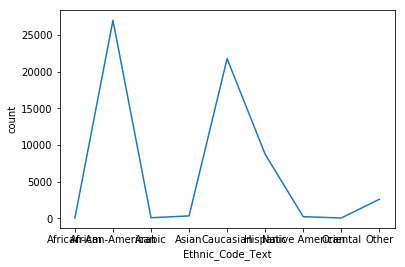

In [60]:
sns.lineplot(x = 'Ethnic_Code_Text', y = 'count', data = raw_ethnic_grouped, legend = False)
plt.show

In [61]:
raw_english = compas_raw.loc[:,["Language"]]
raw_english_grouped = raw_english.groupby(["Language"]).size().reset_index()
raw_english_grouped.columns = ["Language","count"]
raw_english_grouped

,Language,count
0,English,60591
1,Spanish,252


In [63]:
raw_marriage = compas_raw.loc[:,["MaritalStatus"]]
raw_marriage_grouped = raw_marriage.groupby(["MaritalStatus"]).size().reset_index()
raw_marriage_grouped.columns = ["MaritalStatus","count"]
raw_marriage_grouped

,MaritalStatus,count
0,Divorced,3879
1,Married,8172
2,Separated,1803
3,Significant Other,1260
4,Single,45126
5,Unknown,213
6,Widowed,390


In [65]:
raw_legalstatus = compas_raw.loc[:,["LegalStatus"]]
raw_legalstatus_grouped = raw_legalstatus.groupby(["LegalStatus"]).size().reset_index()
raw_legalstatus_grouped.columns = ["LegalStatus","count"]
raw_legalstatus_grouped

,LegalStatus,count
0,Conditional Release,420
1,Deferred Sentencing,12
2,Other,4356
3,Parole Violator,18
4,Post Sentence,18333
5,Pretrial,37578
6,Probation Violator,126


In [69]:
raw_custody = compas_raw.loc[:,["CustodyStatus"]]
raw_custody_grouped = raw_custody.groupby(["CustodyStatus"]).size().reset_index()
raw_custody_grouped.columns = ["CustodyStatus","count"]
raw_custody_grouped

,CustodyStatus,count
0,Jail Inmate,30129
1,Parole,21
2,Pretrial Defendant,7644
3,Prison Inmate,15
4,Probation,22968
5,Residential Program,66


In [71]:

raw_agency = compas_raw.loc[:,["Agency_Text"]]
raw_agency_grouped = raw_reason.groupby(["Agency_Text"]).size().reset_index()
raw_agency_grouped.columns = ["Agency_Text","count"]
raw_agency_grouped

KeyError: 'Agency_Text'

In [66]:
raw_reason = compas_raw.loc[:,["AssessmentReason"]]
raw_reason_grouped = raw_reason.groupby(["AssessmentReason"]).size().reset_index()
raw_reason_grouped.columns = ["AssessmentReason","count"]
raw_reason_grouped

,AssessmentReason,count
0,Intake,60843


,CustodyStatus,count
0,Jail Inmate,30129
1,Parole,21
2,Pretrial Defendant,7644
3,Prison Inmate,15
4,Probation,22968
5,Residential Program,66


In [ ]:
age_grouped = compas_two_year_violent.groupby(["age"]).size().reset_index()
age_grouped.columns = ["age","count"]
sns.lineplot(x = 'age', y = 'count', data = age_grouped, legend = False)
plt.show

In [18]:
compas_two_year = pd.read_csv('data/compas-scores-two-years.csv')
compas_two_year.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


In [24]:
compas_two_year.shape

(7214, 53)

In [20]:
compas_two_year_violent = pd.read_csv('data/compas-scores-two-years-violent.csv')
compas_two_year_violent.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid,two_year_recid.1
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1,1
2,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0,0
3,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,Low,2013-03-26,NaN,NaN,2,0,1102,0,0,0
4,7,marsha miles,marsha,miles,2013-11-30,Male,1971-08-22,44,25 - 45,Other,...,Low,2013-11-30,2013-11-30,2013-12-01,0,1,853,0,0,0


In [27]:
compas_two_year_violent.shape

(4743, 54)

In [29]:
compas_two_year_violent['id'][1]

3

In [30]:
max = 0
for i in range(1,4743):
    if compas_two_year_violent['id'][i] > max:
        max = compas_two_year_violent['id'][i]

In [31]:
max

11000

In [ ]:
graph age, gender, race, screening time

In [43]:
violent_sex = compas_two_year_violent.loc[:,["sex"]]
violent_sex_grouped = violent_sex.groupby(["sex"]).size().reset_index()
violent_sex_grouped.columns = ["sex","count"]

In [45]:
violent_sex_grouped

,sex,count
0,Female,997
1,Male,3746


<function matplotlib.pyplot.show(*args, **kw)>

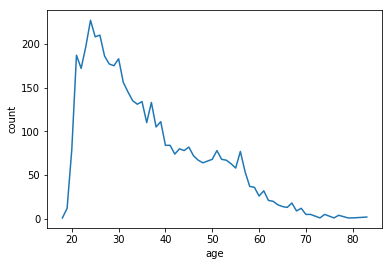

In [50]:
age_grouped = compas_two_year_violent.groupby(["age"]).size().reset_index()
age_grouped.columns = ["age","count"]
sns.lineplot(x = 'age', y = 'count', data = age_grouped, legend = False)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

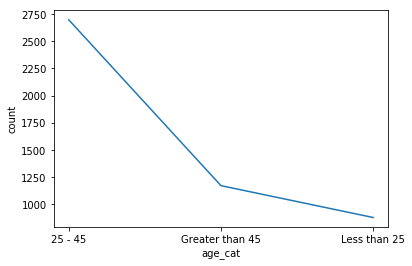

In [52]:
age_cat_grouped = compas_two_year_violent.groupby(["age_cat"]).size().reset_index()
age_cat_grouped.columns = ["age_cat","count"]
sns.lineplot(x = 'age_cat', y = 'count', data = age_cat_grouped, legend = False)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

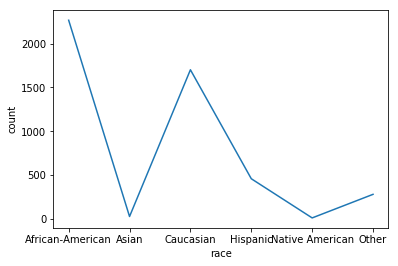

In [51]:
race_grouped = compas_two_year_violent.groupby(["race"]).size().reset_index()
race_grouped.columns = ["race","count"]
sns.lineplot(x = 'race', y = 'count', data = race_grouped, legend = False)
plt.show

In [ ]:
district = sfpd.loc[:, ["PdDistrict","Category"]]
grouped = DTIC.groupby(["DayOfWeek"]).size().reset_index()
grouped.columns = ["DayOfWeek","count"]
sns.lineplot(x = 'DayOfWeek', y = 'count', data = grouped, legend = False)
plt.show

### 5. visualizations to help understand data(20)